## The IMDB Reviews Dataset

In [0]:
from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

Downloaded dataset is already encoded in the bag of words. And sorted in the order from most to less used.

In [168]:
print(x_train[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


So the review encoded in that sequence of numbers is negative.

In [0]:
class_names = ['negative', 'positive'] # just for comfortable using

In [4]:
word_index = imdb.get_word_index() #for getting index of the word

1646592/1641221 [==============================] - 0s 0us/step


This dataset is almost a textbook case of Zipf's law. 
In English language words "the," "be", "to", "of", "and", "a", "in", "that", "have", and "I" make up 25% (25.06% to be precise) of all spoken language. So every fourth word you are saying is one of those. 
And first most frequent words here are:

1. the
2. and
3. a
4. of
5. to
6. is

...
17. movie

...
19. film


But obviously, the distribution is affected by the specifics of the dataset. For example, 'film' and 'movie' is relatively high in the list (clearly because of the fact that dataset consists of movie reviews). 

The word 'be' is not in the second place because there is no lemmatization on this dataset (so it's frequencies are divided between 'is', 'was', 'am', 'being', etc).

In [0]:
reverse_word_index = dict((value, key) for key, value in word_index.items())

In [0]:
def decode(review):
  # small function for decoding numbers to text
  text = ''
  for i in review:
    text += reverse_word_index[i]+ ' '

  return text

In [7]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [0]:
def show_len():
  print('Length of the first training example', len(x_train[0]))
  print('Length of the second training example', len(x_train[1]))
  print('Length of the first test example', len(x_test[0]))
  print('Length of the second test example', len(x_test[1]))

In [9]:
show_len()

Length of the first training example 218
Length of the second training example 189
Length of the first test example 68
Length of the second test example 260


The length is quite different for every entry. For working with the neural networks we have to fix this.


## Padding the Examples



Some words are very 'powerful' for the sentiment analysis ('terrible', 'disgusting', 'stunning'). Some of them are rather meaningless for our purposes ('the', 'a', etc). So why don't we use those meaningless words to pad the comments to the same length?

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
x_train = pad_sequences(x_train, value = 1, padding = 'post', maxlen = 256) 
x_test = pad_sequences(x_test, value = 1, padding = 'post', maxlen = 256) 
# 'value = 1' is a word 'the', 
# 'padding = post' adds padding after the text if needed, 
# 'maxlen = 256'  for most texts 256 is more than enough

In [12]:
print('Hooray! Now we can actually work with the data')
show_len()

Hooray! Now we can actually work with the data
Length of the first training example 256
Length of the second training example 256
Length of the first test example 256
Length of the second test example 256


In [13]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

What is done? Couple of 'the' is added to the end of every text to make its length 256.

## One hot encoding vs Word Embeddings
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. Word embeddings are in fact a class of techniques where individual words are represented as real-valued vectors in a predefined vector space. Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network, and hence the technique is often lumped into the field of deep learning. The distributed representation is learned based on the usage of words. This allows words that are used in similar ways to result in having similar representations, naturally capturing their meaning. This can be contrasted with the crisp but fragile representation in a bag of words model where, unless explicitly managed, different words have different representations, regardless of how they are used.  [sourse](https://machinelearningmastery.com/what-are-word-embeddings/)

So when One hot encoder learned that 'This red book is interesting', it won't see any similarities with 'This blue ___ is interesting'. Meanwhile, in words embedding, colors are vectors close to each other. 


## Creating and Training the Model, Predictions and Evaluation


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Embedding, GlobalAveragePooling1D

In [15]:
model = Sequential([
      Embedding(10000, 10),
      GlobalAveragePooling1D(),
      Dense(10, activation= 'relu'),
      Dense(1, activation='relu'),
      Dense(1, activation='sigmoid'),           
])

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 10)          100000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 100,123
Trainable params: 100,123
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.callbacks import LambdaCallback

import matplotlib.pyplot as plt
%matplotlib inline

from time import time

In [25]:
simple_log = LambdaCallback(on_epoch_end=lambda e,l: print(e, end = '. '))
E = 20
start_time  = time()
h = model.fit(x_train, y_train, validation_split = 0.2, epochs = E, callabacks = [simple_log],
            verbose = False)
end_time = time()
print('Time spent for training = ', end_time - start_time)

Time spent for training =  38.119938135147095


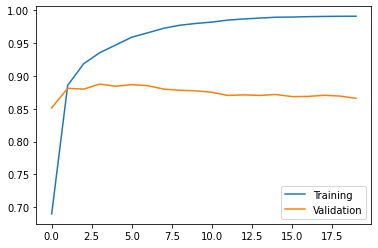

In [18]:
plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

In [19]:
h.history['val_accuracy'][::4]

[0.8514000177383423,
 0.8844000101089478,
 0.8781999945640564,
 0.8712000250816345,
 0.8687999844551086]

In [20]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy: ', acc*100)

782/782 [==============================] - 2s 2ms/step - loss: 0.8038 - accuracy: 0.8508
Test set accuracy:  85.07599830627441


And what we see is overfitting. The validation accuracy was quite high from the beginning (89.1%) and then slowly went down to 87% (on validation set). On training set it shows accuracy of 85% Both results are not bad for a simple model like this one and short time for training (40 seconds on CPU)


In [0]:
import numpy as np

In [0]:
p = model.predict(np.expand_dims(x_test[0], axis=0))

In [27]:
print(str(class_names[int(np.round(p[0]))]) + ' with a score ' + str(int(p[0]*100 ))+ '%')

negative with a score 3%


So as a final output model gives us prediction if the review is positive or negative and a score of a review (with a 50% as a threshold).

What could be added and improved? First of all, playing with early stopping and regularizations should help to improve accuracy and solve the problem with overfitting. Also while playing with the number of categories that the model creates for categorizing words accuracy was increased (from 83.5% for 16 categories to 85.1% for only 10). 